<a href="https://colab.research.google.com/github/vmali007/Machine-Learning/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [214]:
path = '/content/Data Analyst Assignment (1).xlsx'
data = pd.read_excel(path,sheet_name='Assignment-1')

In [215]:
data.isnull().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [216]:
df = data.copy()

In [217]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [218]:
df.describe(include='all')

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
count,16834,16834,16834,16834,16834,16834,16834,16834,16834,16834,16834,16834,16834.000000,16834.000000,16834.000000,16288.000000
unique,257,1,1,2,2,2,4,4,3,4,4,7,NaN,NaN,NaN,NaN
top,2020-01-02 00:00:00,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,NaN,NaN,NaN,NaN
freq,169,16834,16834,15101,15101,15101,7853,15101,15101,15101,7357,3097,NaN,NaN,NaN,NaN
first,2019-10-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-07-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.694236,287.959190,11.977783,2.170371
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483.895724,2444.450313,44.796963,18.659132
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.180000,3.000000,0.000000,0.000000


In [219]:
df.drop(['product','phase'],axis=1,inplace=True)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   campaign_platform     16834 non-null  object        
 2   campaign_type         16834 non-null  object        
 3   communication_medium  16834 non-null  object        
 4   subchannel            16834 non-null  object        
 5   audience_type         16834 non-null  object        
 6   creative_type         16834 non-null  object        
 7   creative_name         16834 non-null  object        
 8   device                16834 non-null  object        
 9   age                   16834 non-null  object        
 10  spends                16834 non-null  float64       
 11  impressions           16834 non-null  int64         
 12  clicks                16834 non-null  int64         
 13  link_clicks     

In [221]:
df['weekday'] = df['Date'].dt.weekday
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [222]:
df['google_ads'] = pd.get_dummies(df['campaign_platform'],drop_first=True)
df['search'] = pd.get_dummies(df['campaign_type'],drop_first=True)
df['search_keyboard'] = pd.get_dummies(df['communication_medium'],drop_first=True)


In [223]:
submap = {'Facebook Ads':1,'Generic':2,'Competitor':3,'Brand':4}
df['subchannel'] = df['subchannel'].map(submap)

In [224]:
df.head()

,Date,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks,weekday,day,month,year,google_ads,search,search_keyboard
0,2019-10-16,Google Ads,Search,Search Keywords,4,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0,2,16,10,2019,1,1,1
1,2019-10-16,Google Ads,Search,Search Keywords,4,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0,2,16,10,2019,1,1,1
2,2019-10-16,Google Ads,Search,Search Keywords,4,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0,2,16,10,2019,1,1,1
3,2019-10-16,Google Ads,Search,Search Keywords,4,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0,2,16,10,2019,1,1,1
4,2019-10-18,Google Ads,Search,Search Keywords,4,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0,4,18,10,2019,1,1,1


In [225]:
df['audience_type'] = df['audience_type'].replace("'-",'Missing')
df['creative_type'] = df['creative_type'].replace("'-",'Missing')
df['creative_name'] = df['creative_name'].replace("'-",'Missing')


In [226]:
mode = df['age'].mode()[0]
df['age_na'] = np.where(df['age'] == 'Undetermined',1,0)
df['age'] = df['age'].replace('Undetermined',mode)

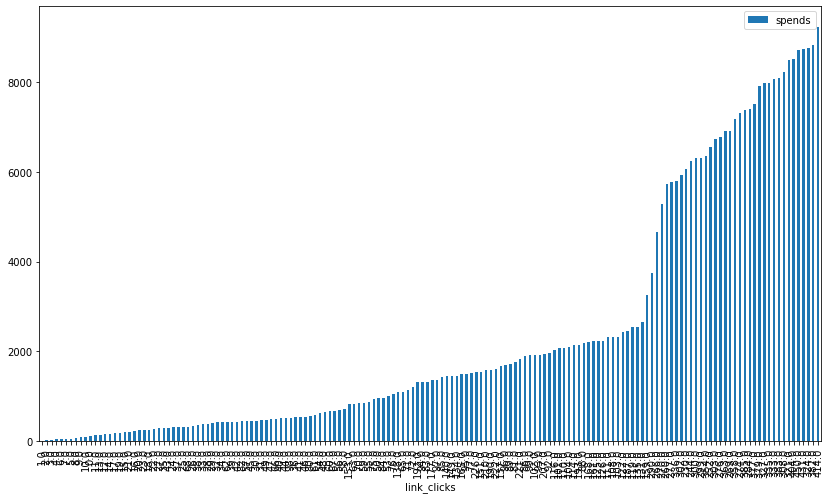

In [228]:
df[['link_clicks','spends']].groupby(['link_clicks']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                           figsize = (14,8))

In [229]:
l_mean = df['link_clicks'].mean()
df['link_clicks_na'] = np.where(df['link_clicks'].isnull(),1,0)
df['link_clicks'].fillna(l_mean,inplace = True)

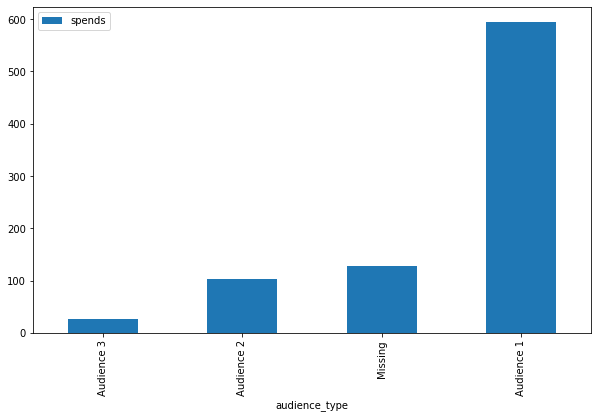

In [230]:
df[['audience_type','spends']].groupby(['audience_type']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                               figsize=(10,6))

   **By this we can say Audience of type Audience 1 spends more then others**




In [231]:
df['audience_type_na'] = np.where(df['audience_type'] is 'Missing',1,0)
audi_map = {'Audience 1':1,'Missing':2,'Audience 2':3,'Audience 3':4}
df['audience_type'] = df['audience_type'].map(audi_map)

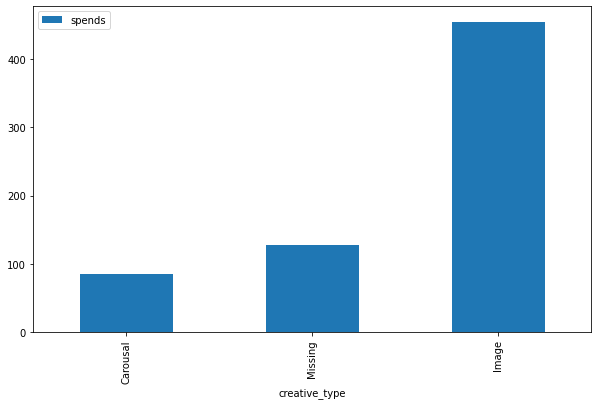

In [232]:
df[['creative_type','spends']].groupby(['creative_type']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                               figsize=(10,6))

**For Creative type Image people spends more than for others**

In [233]:
df['creative_type'].value_counts()

Missing     15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [234]:
df['creative_type_na'] = np.where(df['creative_type']=='Missing',1,0)
Crea_map = {'Image':1,'Missing':2,'Carousal':3}
df['creative_type'] = df['creative_type'].map(Crea_map)

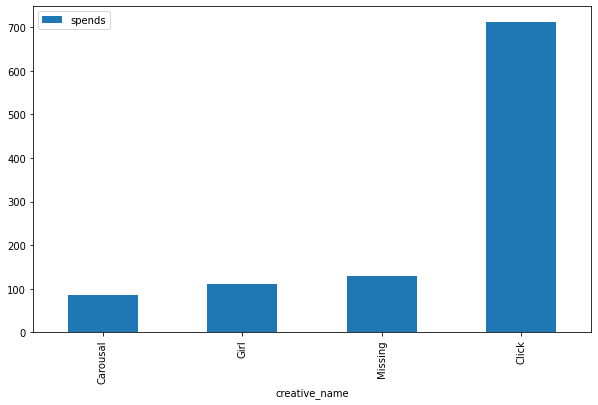

In [236]:
df[['creative_name','spends']].groupby(['creative_name']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                               figsize=(10,6))

**By above figure we can say people like to spend more on creative name Click than others**

In [237]:
df['creative_name'].value_counts()

Missing     15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [238]:
df['creative_name_na'] = np.where(df['creative_name']=='Missing',1,0)
crea_map = {'Click':1,'Missing':2,'Girl':3,'Carousal':4}
df['creative_name'] = df['creative_name'].map(crea_map)

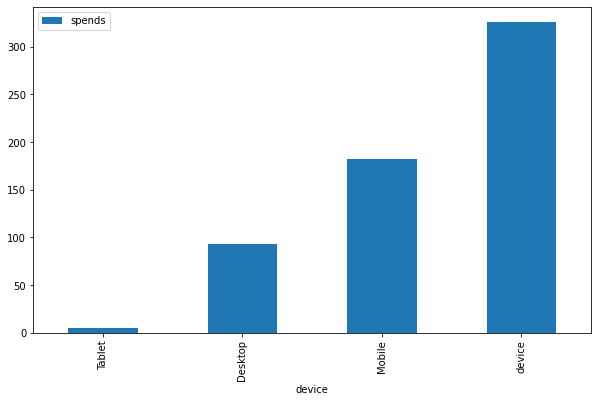

In [239]:
df[['device','spends']].groupby(['device']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                               figsize=(10,6))

**People spend more on devices followed by Mobile Desktop**

In [240]:
dev_map = {'device':1,'Mobile':2,'Desktop':3,'Tablet':4}
df['device'] = df['device'].map(dev_map)

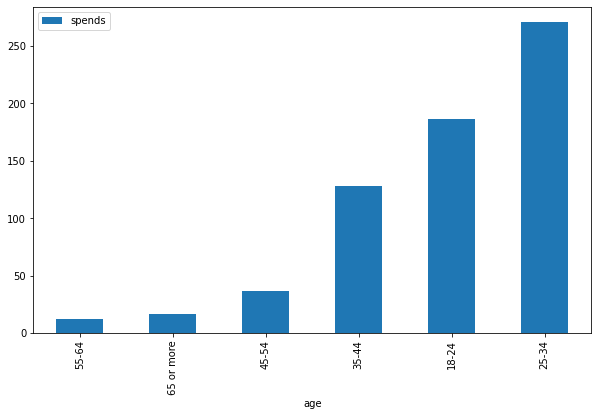

In [241]:
df[['age','spends']].groupby(['age']).mean().sort_values(by='spends').plot(kind= 'bar',
                                                                                               figsize=(10,6))

**Hence We conclude that all Young People spends more than old People**

In [242]:
df['age'].value_counts()

25-34         5683
35-44         2865
45-54         2499
18-24         2472
55-64         1757
65 or more    1558
Name: age, dtype: int64

In [243]:
ag_map = {'18-24':1,'25-34':2,'35-44':3,'45-54':4,'55-64':5,'65 or more':6}
df['age'] = df['age'].map(ag_map)

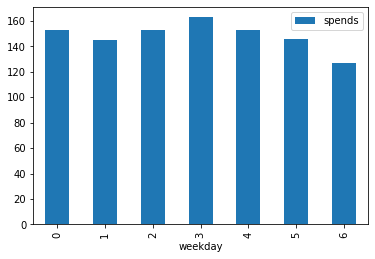

In [245]:
df[['weekday','spends']].groupby(['weekday']).mean().plot(kind='bar')

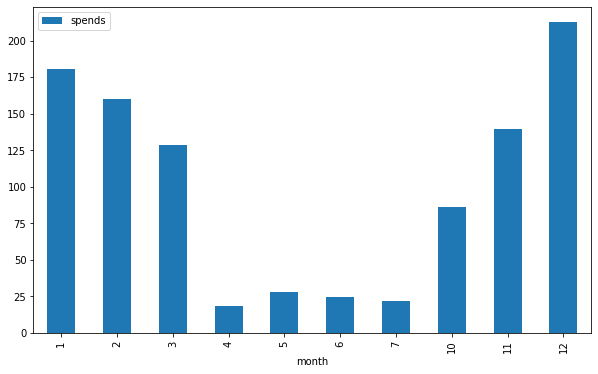

In [246]:
df[['month','spends']].groupby(['month']).mean().plot(kind='bar',figsize = (10,6))

**As we can see the spending in month from April to Jully is very Low**

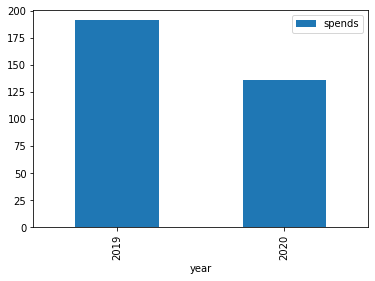

In [247]:
df[['year','spends']].groupby(['year']).mean().plot(kind='bar')

**The spending in 2019 is more then the 2020 beacause as we see above in 4 months april to jully the spending was less**

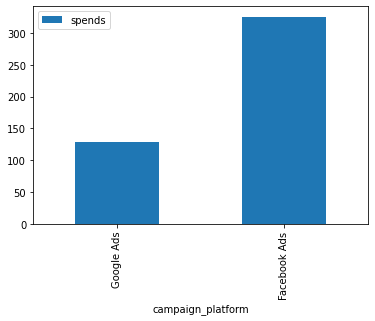

In [248]:
df[['campaign_platform','spends']].groupby(['campaign_platform']).mean().sort_values(by='spends').plot(kind= 'bar')

Peoples Spend more by Facebook aids as compare to Google aids

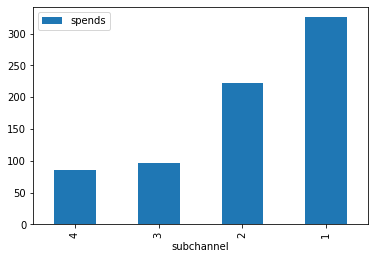

In [249]:
df[['subchannel','spends']].groupby(['subchannel']).mean().sort_values(by='spends').plot(kind='bar')

In subchannel also people spend by facebook ads

In [250]:
df.drop(['Date','campaign_platform','campaign_type','communication_medium'],axis = 1,inplace=True)

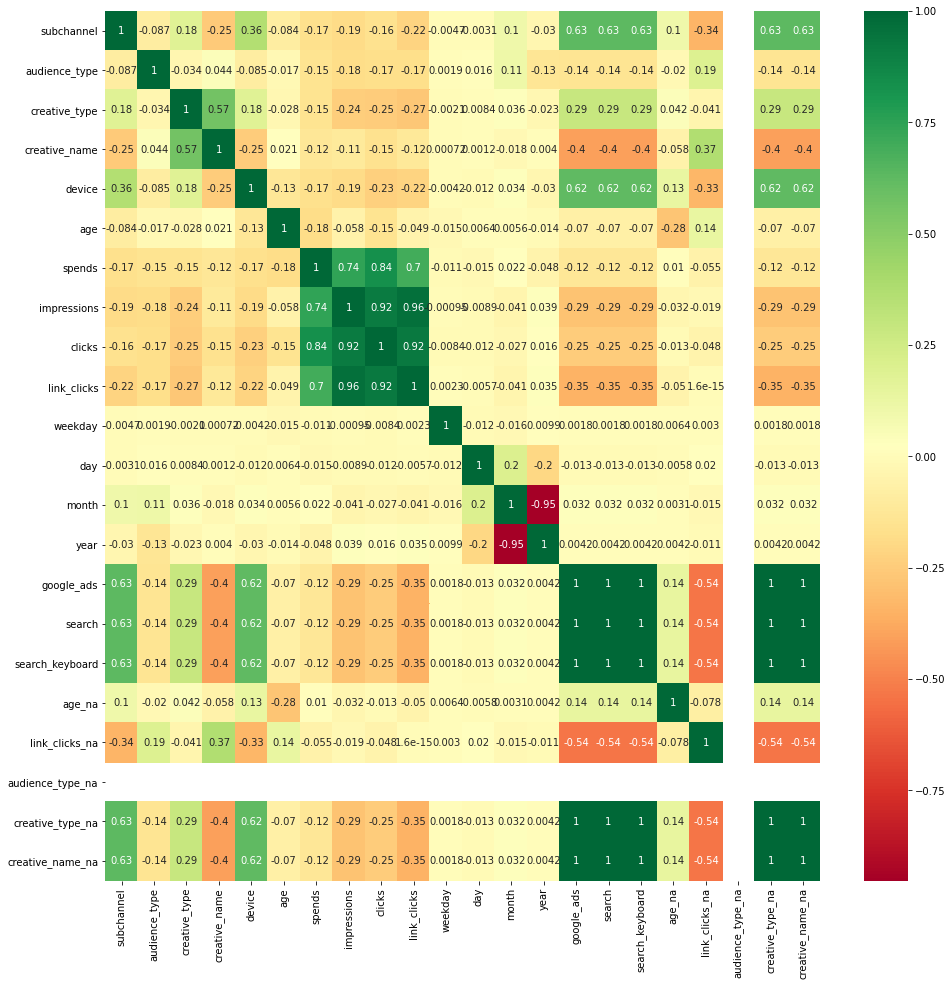

In [251]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")


In [269]:
X = df.drop('spends',axis=1)
y = df['spends']
df1 = df.copy()

In [270]:
from sklearn.feature_selection import SelectKBest,f_classif

selector = SelectKBest(f_classif,k=20)

X_new = selector.fit_transform(X,y)
X_new

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [18] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


array([[4., 2., 2., ..., 0., 1., 1.],
       [4., 2., 2., ..., 0., 1., 1.],
       [4., 2., 2., ..., 0., 1., 1.],
       ...,
       [4., 2., 2., ..., 0., 1., 1.],
       [4., 2., 2., ..., 0., 1., 1.],
       [4., 2., 2., ..., 0., 1., 1.]])

In [271]:
selected_features = pd.DataFrame(selector.inverse_transform(X_new),index=X.index,columns=X.columns)
selected_col = selected_features.columns[selected_features.var() != 0]
X = X[selected_col]

In [272]:
X.head()

,subchannel,audience_type,creative_type,creative_name,device,age,impressions,clicks,link_clicks,weekday,day,month,year,google_ads,search,search_keyboard,age_na,link_clicks_na,creative_type_na,creative_name_na
0,4,2,2,2,3,1,2,0,0.0,2,16,10,2019,1,1,1,0,0,1,1
1,4,2,2,2,3,2,5,0,0.0,2,16,10,2019,1,1,1,0,0,1,1
2,4,2,2,2,3,3,1,0,0.0,2,16,10,2019,1,1,1,0,0,1,1
3,4,2,2,2,3,2,5,3,0.0,2,16,10,2019,1,1,1,1,0,1,1
4,4,2,2,2,3,1,10,2,0.0,4,18,10,2019,1,1,1,0,0,1,1


In [273]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.25,random_state=1)

In [343]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
max_depth = [100,200,300,400,500]
min_samples_leaf = [1, 2, 4,6]
param_grid ={'max_depth': [450],
             'max_features': ['log2'],
             'min_samples_leaf': [1, 3, 5],
             'min_samples_split': [3, 4, 5, 6, 7],
             'n_estimators': [100, 200, 300, 400,500]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [344]:
grid_search.fit(X,y)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  7.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [345]:
grid_search.best_params_

{'max_depth': 450,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [346]:
model = RandomForestRegressor(max_depth = 450,
                              max_features= 'log2',
                              min_samples_leaf= 3,
                              min_samples_split = 5,
                              n_estimators= 100)
model.fit(train_X,train_y)
score = model.score(test_X,test_y)
score

0.9063029646866848

In [347]:
model = RandomForestRegressor()
model.fit(train_X,train_y)
score = model.score(test_X,test_y)
score

0.9333740329767934

We can Get More Accuracy by default than the Hyperparameter tuning

In [339]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scal =pd.DataFrame(scalar.fit_transform(X))
X_scal.columns = X.columns


In [340]:
X_scal.head()

,subchannel,audience_type,creative_type,creative_name,device,age,impressions,clicks,link_clicks,weekday,day,month,year,google_ads,search,search_keyboard,age_na,link_clicks_na,creative_type_na,creative_name_na
0,0.94197,-0.04671,0.098038,-0.136987,0.707838,-1.314313,-0.116986,-0.267387,-0.118254,-0.486241,0.089696,1.318718,-1.819887,0.338763,0.338763,0.338763,-0.426027,-0.183089,0.338763,0.338763
1,0.94197,-0.04671,0.098038,-0.136987,0.707838,-0.658325,-0.115759,-0.267387,-0.118254,-0.486241,0.089696,1.318718,-1.819887,0.338763,0.338763,0.338763,-0.426027,-0.183089,0.338763,0.338763
2,0.94197,-0.04671,0.098038,-0.136987,0.707838,-0.002338,-0.117396,-0.267387,-0.118254,-0.486241,0.089696,1.318718,-1.819887,0.338763,0.338763,0.338763,-0.426027,-0.183089,0.338763,0.338763
3,0.94197,-0.04671,0.098038,-0.136987,0.707838,-0.658325,-0.115759,-0.200416,-0.118254,-0.486241,0.089696,1.318718,-1.819887,0.338763,0.338763,0.338763,2.347268,-0.183089,0.338763,0.338763
4,0.94197,-0.04671,0.098038,-0.136987,0.707838,-1.314313,-0.113714,-0.222740,-0.118254,0.524799,0.321871,1.318718,-1.819887,0.338763,0.338763,0.338763,-0.426027,-0.183089,0.338763,0.338763


In [341]:
X_train,X_test,y_train,y_test = train_test_split(X_scal,y,test_size = .3)

In [342]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
score 

0.9424523696666719

**By Scaling and using Random Forest we can get High accuracy**